The goal of this capstone project was to analyze bike rental data and build predictive models
using both regression and classification techniques.
The regression models is to predict the exact number of bike rentals,
while classification models categorized rental demand into Low, Medium, and High levels.

In [1]:
#This project is about the "bike rental data" datasets 
#project motive is Predicting Bike Rental Demand 
#Will find out affeting bike rental on various factors 
#*****Part(A): EDA 
#1.Preporssing steps
#2.Identifying Missing Values
#3.Summary statistics
#4.Visualization of relation of various factor on regarding bike rental
#5.Correlation Analysis
#6.Finding outliers and its Visualizations
######Part_B Model_Building Regressions######
#Converting_rent_date column to seperate columns
#Applying_all_possibile_regressions
#Model Performance Visualization (Bar Plots)
######Part_B2 Classifications######
#convert the continuous target into 3 classes using quantile,Low,Medium,High
#drop unnessory columns
#applying all the clkassificatinn
#Model Performance Visualization (Bar Plots)
#Conclusion

In [ ]:
###Part_A####3

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bike=pd.read_csv("bike.csv")

In [4]:
bike

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:

bike.head()

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   rent_date              17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   year                   17379 non-null  int64  
 4   month                  17379 non-null  int64  
 5   hour                   17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [7]:
bike.shape

(17379, 17)

In [8]:
bike.isnull().sum()

instant                  0
rent_date                0
season                   0
year                     0
month                    0
hour                     0
holiday                  0
weekday                  0
workingday               0
weathersit               0
temp                     0
atemp                    0
hum                      0
windspeed                0
casual                   0
registered               0
number_of_bike_rental    0
dtype: int64

In [9]:
bike.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
bike['rent_date'] = pd.to_datetime(bike['rent_date']) # converting in to datetime formate

In [11]:
#find belo are the EDA plots to know more visualization and insights of the dataset " Bike"
#1._lineplot:Trend analysis over seasons
#2._Lineplot:Trend analysis over months
#3._Line plot:Total bike rentals over Date
#4._Barplot: trend on bike rental based opn weather sitiation
#5._Boxplot:Number of bike rental over month by boxplot
#6._Scatterplot:Temperature effect on Bike rental
#7._#Correlation heatmap on bike rental

<Axes: xlabel='season', ylabel='number_of_bike_rental'>

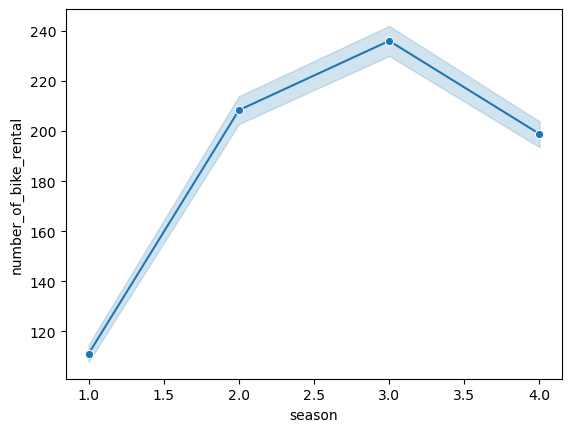

In [12]:
#1._trend analysis over seasons

sns.lineplot(data=bike,x="season",y="number_of_bike_rental",marker="o")

<Axes: xlabel='month', ylabel='number_of_bike_rental'>

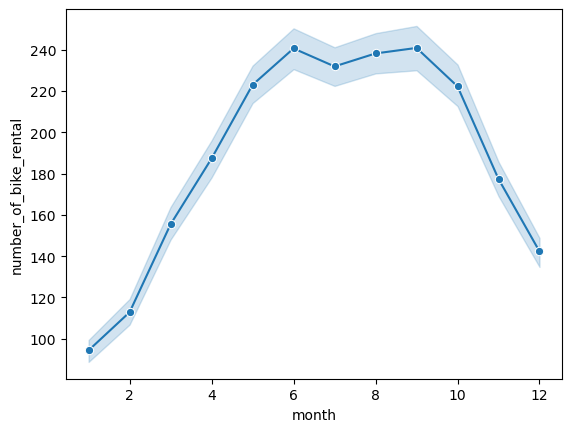

In [13]:
#trend analysis over months

sns.lineplot(data=bike,x="month",y="number_of_bike_rental",marker="o")

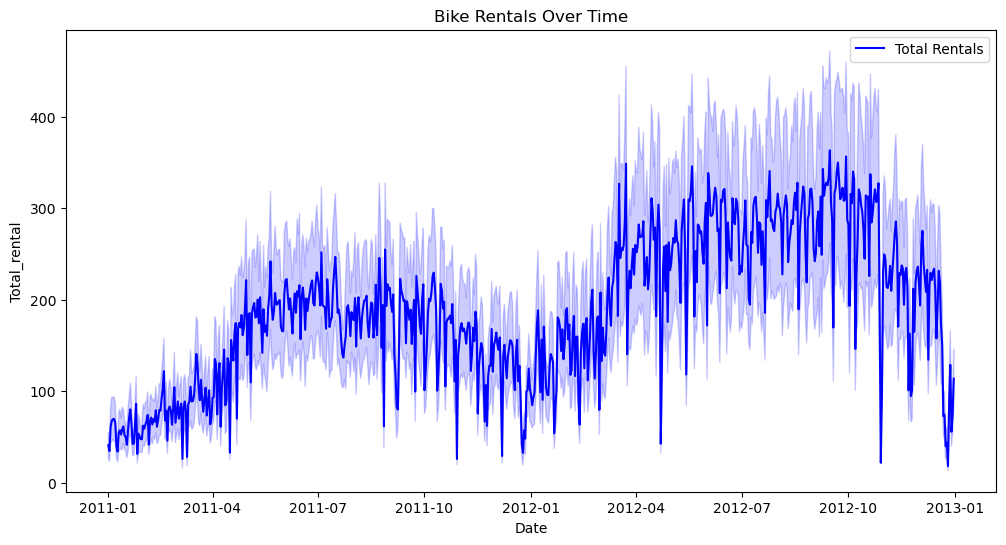

In [14]:
# Line plot for total bike rentals over Date
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Total Rentals', color='blue')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total_rental')
plt.show()

<Axes: xlabel='weathersit', ylabel='number_of_bike_rental'>

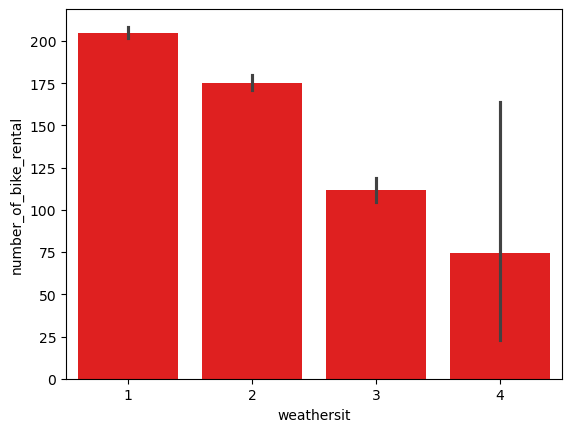

In [15]:
#trend on bike rental based opn weather sitiation

sns.barplot(data=bike,x="weathersit",y="number_of_bike_rental",color="r")

<Axes: xlabel='month', ylabel='number_of_bike_rental'>

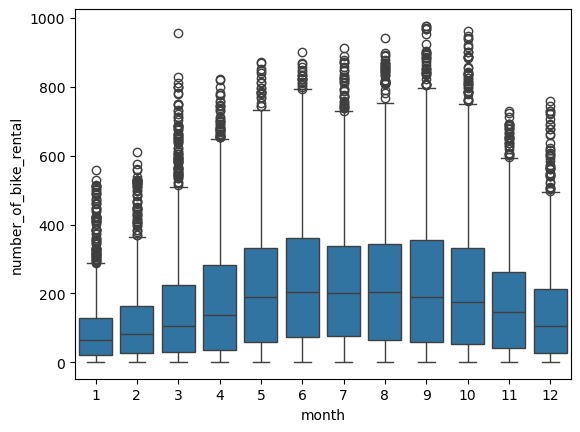

In [16]:
#number of bike rental over month by boxplot

sns.boxplot(data=bike,x="month",y="number_of_bike_rental")

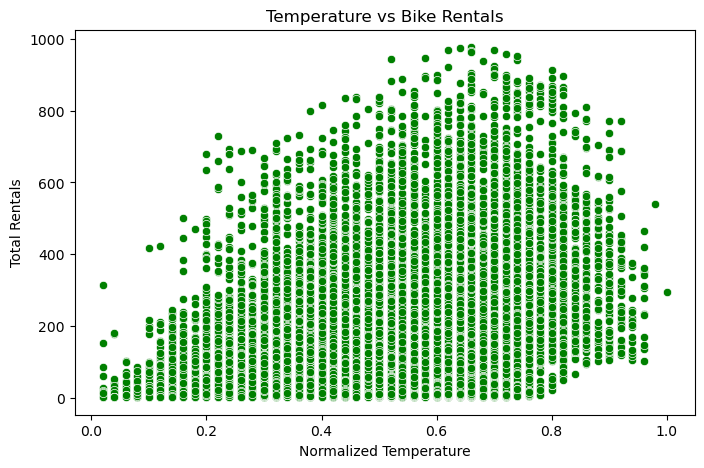

In [17]:
#Temperature effect on Bike rental
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='number_of_bike_rental', data=bike, color='green')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

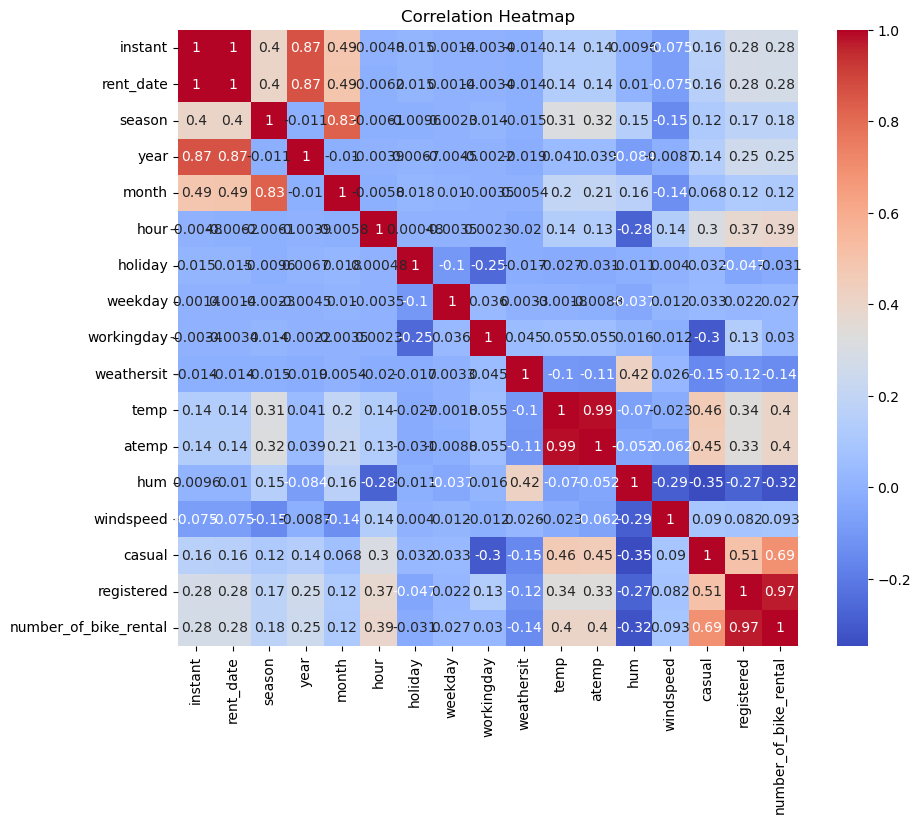

In [18]:
#Correlation heatmap on bike rental
plt.figure(figsize=(10, 8))
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#finding out the Outliers
#Here we are using two method to find out outliers
#1._IQR Method
#2._Z-Score Method

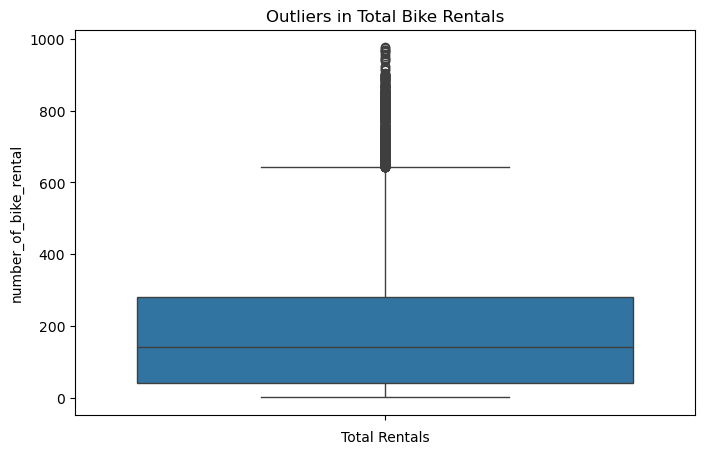

In [20]:
#Detecting Outliers in Total Rentals

plt.figure(figsize=(8, 5))
sns.boxplot(bike['number_of_bike_rental'])
plt.title('Outliers in Total Bike Rentals')
plt.xlabel('Total Rentals')
plt.show()

In [21]:
#.1_ IQR Method for Outlier Detection
Q1 = bike['number_of_bike_rental'].quantile(0.25)
Q3 = bike['number_of_bike_rental'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['number_of_bike_rental'] < lower_bound) | (bike['number_of_bike_rental'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['rent_date', 'number_of_bike_rental']])

Number of outliers detected: 505
       rent_date  number_of_bike_rental
5536  2011-08-23                    651
10358 2012-03-12                    644
10359 2012-03-12                    712
10382 2012-03-13                    676
10383 2012-03-13                    734
...          ...                    ...
16885 2012-12-11                    724
16909 2012-12-12                    688
16933 2012-12-13                    679
17053 2012-12-18                    662
17077 2012-12-19                    678

[505 rows x 2 columns]


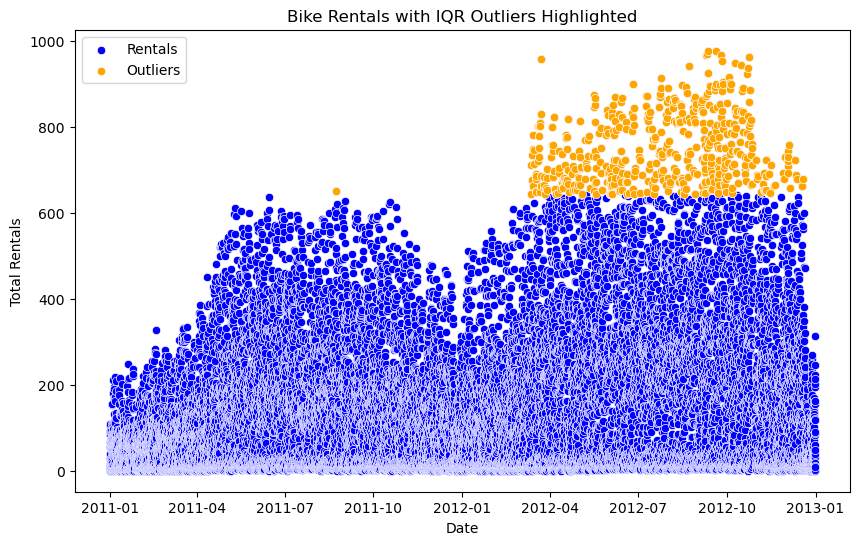

In [22]:
# Visualization of IQR Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Rentals', color='blue')
sns.scatterplot(data=outliers, x='rent_date', y='number_of_bike_rental', label='Outliers', color='orange')
plt.title('Bike Rentals with IQR Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [23]:
#2._Z-Score Method for Outlier Detection
bike['z_score'] = (bike['number_of_bike_rental'] - bike['number_of_bike_rental'].mean()) / bike['number_of_bike_rental'].std()
z_outliers = bike[(bike['z_score'] > 3) | (bike['z_score'] < -3)]

print(f'Number of outliers detected using Z-Score: {len(z_outliers)}')
print(z_outliers[['rent_date', 'number_of_bike_rental', 'z_score']])


Number of outliers detected using Z-Score: 244
       rent_date  number_of_bike_rental   z_score
10383 2012-03-13                    734  3.002063
10406 2012-03-14                    782  3.266689
10407 2012-03-14                    749  3.084758
10431 2012-03-15                    746  3.068219
10527 2012-03-19                    801  3.371437
...          ...                    ...       ...
15828 2012-10-26                    817  3.459646
15848 2012-10-27                    760  3.145402
15849 2012-10-27                    750  3.090271
16726 2012-12-04                    743  3.051680
16741 2012-12-05                    759  3.139889

[244 rows x 3 columns]


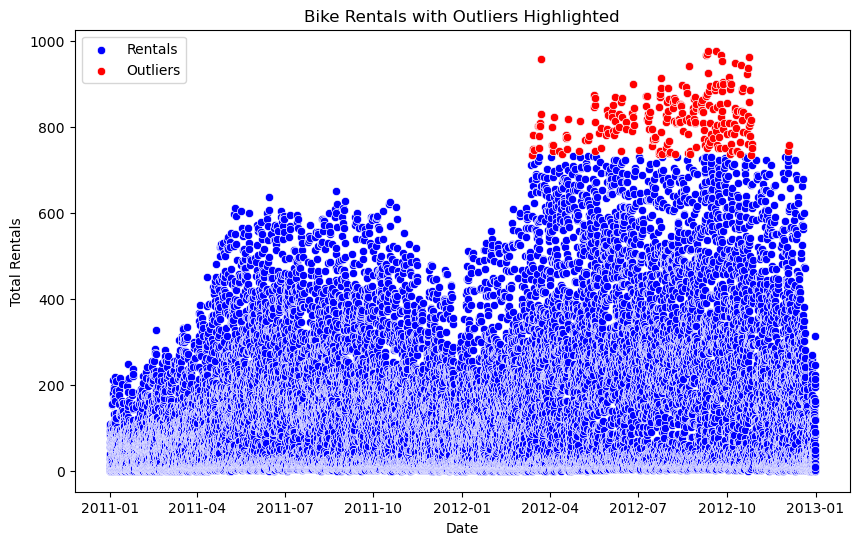

In [24]:
# Visualization of Z-Score Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Rentals', color='blue')
sns.scatterplot(data=z_outliers, x='rent_date', y='number_of_bike_rental', label='Outliers', color='red')
plt.title('Bike Rentals with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()


In [ ]:
######Part_B Model_Building######3

In [26]:
bike.head(3)

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental,z_score
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,-0.956312
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,-0.823998
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,-0.868103


In [27]:
bike = bike.drop(columns=["z_score"])

In [28]:
bike.head(1)

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [29]:
bike.dtypes

instant                           int64
rent_date                datetime64[ns]
season                            int64
year                              int64
month                             int64
hour                              int64
holiday                           int64
weekday                           int64
workingday                        int64
weathersit                        int64
temp                            float64
atemp                           float64
hum                             float64
windspeed                       float64
casual                            int64
registered                        int64
number_of_bike_rental             int64
dtype: object

In [30]:
#Converting_rent_date column to seperate columns
bike['rent_date'] = pd.to_datetime(bike['rent_date'], errors='coerce')
bike['rent_day'] = bike['rent_date'].dt.day
bike['rent_month'] = bike['rent_date'].dt.month
bike['rent_year'] = bike['rent_date'].dt.year
bike['rent_weekday'] = bike['rent_date'].dt.weekday

In [31]:
bike.head(3)

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,number_of_bike_rental,rent_day,rent_month,rent_year,rent_weekday
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,1,1,2011,5
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,1,1,2011,5
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,1,1,2011,5


In [32]:
bike.drop('rent_date', axis=1, inplace=True)

In [33]:
bike.dtypes

instant                    int64
season                     int64
year                       int64
month                      int64
hour                       int64
holiday                    int64
weekday                    int64
workingday                 int64
weathersit                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
number_of_bike_rental      int64
rent_day                   int32
rent_month                 int32
rent_year                  int32
rent_weekday               int32
dtype: object

In [38]:
number_of_bike_rental = "casual" + "registered"

In [39]:
bike = bike.drop(['casual', 'registered'], axis=1)

In [41]:
bike.head(1)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,number_of_bike_rental,rent_day,rent_month,rent_year,rent_weekday
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,1,2011,5


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [180]:
X.head(2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rent_day,rent_month,rent_year,rent_weekday
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1,2011,5
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,1,2011,5


In [181]:
y.head(2)

0    16
1    40
Name: number_of_bike_rental, dtype: int64

In [ ]:
#Applying_all_possibile_regressions 

In [49]:
#########Linear_regression|#############
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [50]:
# X and y allocation
X = bike.drop("number_of_bike_rental", axis=1)
y = bike["number_of_bike_rental"]


In [51]:
X.head(2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rent_day,rent_month,rent_year,rent_weekday
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1,2011,5
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,1,2011,5


In [52]:
y.head(2)

0    16
1    40
Name: number_of_bike_rental, dtype: int64

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [55]:
#predictions
y_pred = regressor.predict(X_test)

In [184]:
regressor.predict([[1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1,2011,5]])

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-62.3530708])

In [190]:
y_pred=regressor.predict(X_test)
y_pred

array([451.20493684, 204.44131036,  53.29632573, ...,  54.95768178,
       191.03527713, 215.5926682 ])

In [187]:
y_test

12830    425
8688      88
7091       4
12230    526
431       13
        ... 
6759      17
13989     85
173       98
16192    266
8211     267
Name: number_of_bike_rental, Length: 3476, dtype: int64

In [118]:
#MAE and RMSE 
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

#R² score
r2 = r2_score(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("R² Score LinearRegression :",r2*100)

Mean Absolute Error (MAE): 104.76
Root Mean Squared Error (RMSE): 139.17
R² Score LinearRegression : 38.831098837867515


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
############Randm_forest_Regressor############

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
# Train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [111]:
#predictions
rf_preds = rf_model.predict(X_test)

In [116]:
#MAE and RMSE 
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_mae = mean_absolute_error(y_test, rf_preds)
print("Mean Absolute Error (MAE):", round(rf_mae, 2))
print("Root Mean Squared Error (RMSE):", round(rf_rmse, 2))

#R2_Score
rf_r2 = r2_score(y_test, rf_preds)
print("R² Score (RandomForestRegressor):", round(rf_r2*100))

Mean Absolute Error (MAE): 23.81
Root Mean Squared Error (RMSE): 40.27
R² Score (RandomForestRegressor): 95


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
########### Decision_Tree_Regressor########3

In [119]:
from sklearn.tree import DecisionTreeRegressor


# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [121]:
# Predict on the test data
dt_preds = dt_model.predict(X_test)

#MAE and RMSE 

dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
dt_mae = mean_absolute_error(y_test, dt_preds)
print("Mean Absolute Error (MAE):", round(dt_mae, 2))
print("Root Mean Squared Error (RMSE):", round(dt_rmse, 2))

#R² Score
dt_r2 = r2_score(y_test, dt_preds)
print("R² Score (DecisionTreeRegressor):", round(dt_r2*100))

Mean Absolute Error (MAE): 33.44
Root Mean Squared Error (RMSE): 58.63
R² Score (DecisionTreeRegressor): 89


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
##########KNN_Regressor##########

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [127]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
#Train KNN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [130]:
#Predict
knn_preds = knn_model.predict(X_test_scaled)

#MAE and RMSE 
knn_rmse = mean_squared_error(y_test, knn_preds, squared=False)
knn_mae = mean_absolute_error(y_test, knn_preds)
print("Mean Absolute Error (MAE):", round(knn_mae, 2))
print("Root Mean Squared Error (RMSE):", round(knn_rmse, 2))

#R2_Score
knn_r2 = r2_score(y_test, knn_preds)
print("R² Score (KNeighborsRegressor):", round(knn_r2*100))

Mean Absolute Error (MAE): 80.22
Root Mean Squared Error (RMSE): 117.4
R² Score (KNeighborsRegressor): 56


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
##########SVR################

In [74]:
from sklearn.svm import SVR

In [102]:
#Train Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

SVR()

In [131]:
#Predict
svr_preds = svr_model.predict(X_test_scaled)

#MAE and RMSE 
svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)
svr_mae = mean_absolute_error(y_test, svr_preds)
print("Mean Absolute Error (MAE):", round(svr_mae, 2))
print("Root Mean Squared Error (RMSE):", round(svr_rmse, 2))

#R2_Score
svr_r2 = r2_score(y_test, svr_preds)
print("R² Score (SVR):", round(svr_r2*100))

Mean Absolute Error (MAE): 91.9
Root Mean Squared Error (RMSE): 140.54
R² Score (SVR): 38


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
####### Ridge Regression###########

In [78]:
from sklearn.linear_model import Ridge

In [79]:
#Train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [135]:
#Predict
ridge_preds = ridge_model.predict(X_test)

#MAE and RMSE 
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
print("Mean Absolute Error (MAE):", round(ridge_mae, 2))
print("Root Mean Squared Error (RMSE):", round(ridge_rmse, 2))

#R2_Score
ridge_r2 = r2_score(y_test, ridge_preds)
print("R² Score (Ridge Regression):", round(ridge_r2*100))

Mean Absolute Error (MAE): 104.79
Root Mean Squared Error (RMSE): 139.19
R² Score (Ridge Regression): 39


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
######Lasso_regressor##########

In [82]:
from sklearn.linear_model import Lasso

In [83]:
# Train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [136]:
#Predict
lasso_preds = lasso_model.predict(X_test)

#MAE and RMSE
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
print("Mean Absolute Error (MAE):", round(lasso_mae, 2))
print("Root Mean Squared Error (RMSE):", round(lasso_rmse, 2))

# R2_Score
lasso_r2 = r2_score(y_test, lasso_preds)
print("R² Score (Lasso Regression):", round(lasso_r2*100))

Mean Absolute Error (MAE): 104.74
Root Mean Squared Error (RMSE): 139.83
R² Score (Lasso Regression): 38


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [155]:
#Collect R² scores from all models
r2_scores = {
    "Linear Regression":r2,        
    "Decision Tree Regressor": dt_r2,
    "Random Forest Regressor": rf_r2,
    "KNN Regressor": knn_r2,
    "SVR": svr_r2,
    "Ridge Regression": ridge_r2,
    "Lasso Regression": lasso_r2
}

RMSE_values={
    "Linear Regression":rmse,        
    "Decision Tree Regressor": dt_rmse,
    "Random Forest Regressor": rf_rmse,
    "KNN Regressor": knn_rmse,
    "SVR": svr_rmse,
    "Ridge Regression": ridge_rmse,
    "Lasso Regression": lasso_rmse    
}


MAE_Values={
    "Linear Regression":mae,        
    "Decision Tree Regressor": dt_mae,
    "Random Forest Regressor": rf_mae,
    "KNN Regressor": knn_mae,
    "SVR": svr_mae,
    "Ridge Regression": ridge_mae,
    "Lasso Regression": lasso_mae    
}
#  Create a DataFrame for better visualization
r2_bike = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)
print(r2_bike)

print()
rmse_bike=pd.DataFrame(list(RMSE_values.items()), columns=["Model", "RMSE Values"]).sort_values(by="RMSE Values", ascending=True)
print(rmse_bike)

print()
mae_bike=pd.DataFrame(list(MAE_Values.items()), columns=["Model", "MAE Values"]).sort_values(by="MAE Values", ascending=True)
print(rmse_bike)


                     Model  R2 Score
2  Random Forest Regressor  0.948791
1  Decision Tree Regressor  0.891432
3            KNN Regressor  0.564765
0        Linear Regression  0.388311
5         Ridge Regression  0.388130
6         Lasso Regression  0.382516
4                      SVR  0.376254

                     Model  RMSE Values
2  Random Forest Regressor    40.268405
1  Decision Tree Regressor    58.633114
3            KNN Regressor   117.396348
0        Linear Regression   139.173935
5         Ridge Regression   139.194525
6         Lasso Regression   139.831599
4                      SVR   140.538868

                     Model  RMSE Values
2  Random Forest Regressor    40.268405
1  Decision Tree Regressor    58.633114
3            KNN Regressor   117.396348
0        Linear Regression   139.173935
5         Ridge Regression   139.194525
6         Lasso Regression   139.831599
4                      SVR   140.538868


In [89]:
#Results from regresions
#Random Forest Regressor performs the best, capturing complex patterns with high accuracy.

In [87]:
#Model Performance Visualization (Bar Plots)

In [178]:
#one DataFrame
metrics_bike = r2_bike.merge(rmse_bike, on="Model").merge(mae_bike, on="Model")
print(metrics_bike)

                     Model  R2 Score  RMSE Values  MAE Values
0  Random Forest Regressor  0.948791    40.268405   23.810291
1  Decision Tree Regressor  0.891432    58.633114   33.441600
2            KNN Regressor  0.564765   117.396348   80.219045
3        Linear Regression  0.388311   139.173935  104.755834
4         Ridge Regression  0.388130   139.194525  104.789937
5         Lasso Regression  0.382516   139.831599  104.744361
6                      SVR  0.376254   140.538868   91.904573


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11244\2089778389.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="R2 Score", y="Model", palette="viridis")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11244\2089778389.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="RMSE Values", y="Model", palette="magma")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11244\2089778389.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="MAE Values", y="Model", palette=

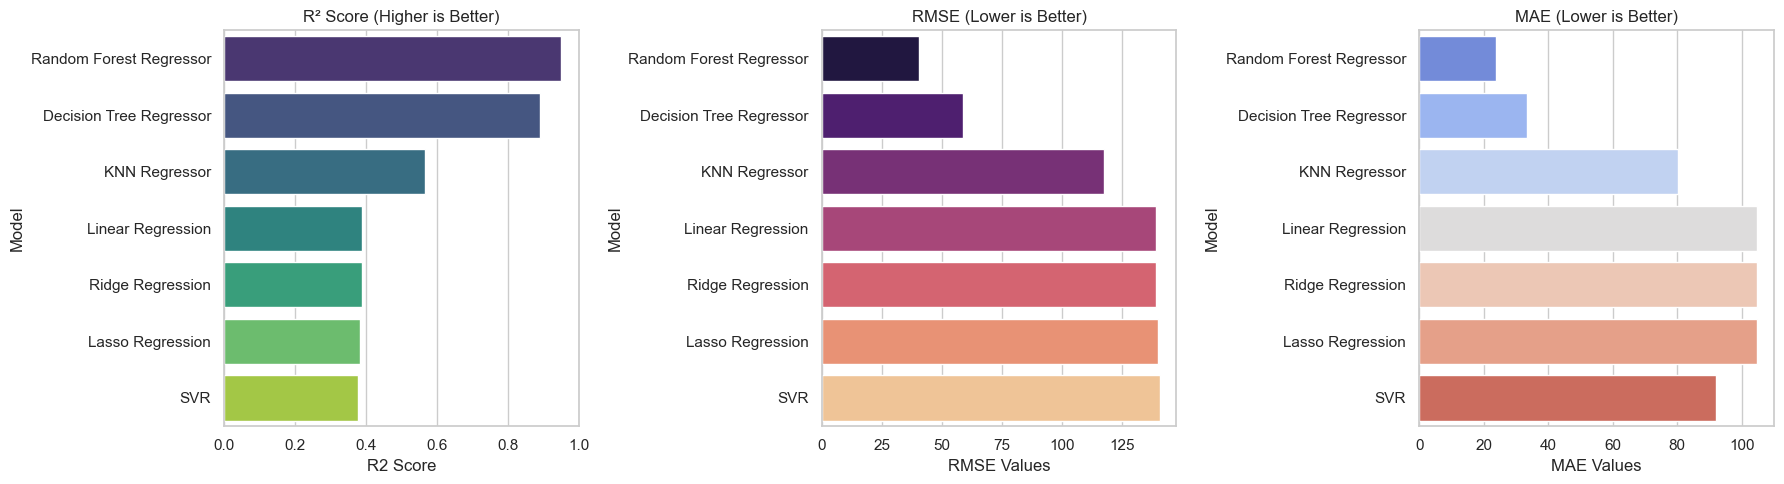

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# R² Score
plt.subplot(1, 3, 1)
sns.barplot(data=metrics_bike, x="R2 Score", y="Model", palette="viridis")
plt.title("R² Score (Higher is Better)")
plt.xlim(0, 1)

# RMSE
plt.subplot(1, 3, 2)
sns.barplot(data=metrics_bike, x="RMSE Values", y="Model", palette="magma")
plt.title("RMSE (Lower is Better)")

# MAE
plt.subplot(1, 3, 3)
sns.barplot(data=metrics_bike, x="MAE Values", y="Model", palette="coolwarm")
plt.title("MAE (Lower is Better)")

plt.tight_layout()
plt.show()


In [202]:
bike.to_csv("bike1.csv",index=False)

In [ ]:
######Part_B2#####

In [392]:
#Classification Algorithm:

In [393]:
# Convert the continuous target into 3 classes using quantiles
bike['rental_class'] = pd.qcut(bike['number_of_bike_rental'], q=3, labels=['Low', 'Medium', 'High'])

# Check distribution of classes
bike['rental_class'].value_counts()


rental_class
Medium    5823
Low       5797
High      5759
Name: count, dtype: int64

In [394]:
bike.head(2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,number_of_bike_rental,rent_day,rent_month,rent_year,rent_weekday,rental_class
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,1,2011,5,Low
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,1,2011,5,Low


In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [396]:
X = bike.drop(columns=['instant', 'number_of_bike_rental', 'rental_class','rent_weekday','rent_year','rent_month','rent_day'])
y = bike['rental_class']

In [397]:
X.head(2)

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0


In [398]:
y.head(2)

0    Low
1    Low
Name: rental_class, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [399]:
#Train_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [400]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [401]:
X_train

array([[-1.35415288,  0.99863432, -1.60748459, ..., -1.35316892,
        -1.43379219,  0.76073408],
       [-0.45334965, -1.00136755, -0.44937765, ...,  0.40943311,
        -1.17426379,  0.27309454],
       [-1.35415288, -1.00136755, -1.31795785, ..., -0.91237303,
         1.26530314, -1.55575795],
       ...,
       [-0.45334965, -1.00136755, -0.44937765, ...,  1.29044336,
         0.5905293 ,  0.76073408],
       [ 0.44745358,  0.99863432,  0.7087293 , ...,  1.02584952,
        -0.9147354 , -0.214545  ],
       [-0.45334965, -1.00136755, -0.44937765, ...,  1.20205157,
        -0.23996156,  1.85771884]])

In [402]:
#Train
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [403]:
#new input prediction

classifier.predict(sc.transform([[1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0]]))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

In [404]:
y_pred=classifier.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
rental_class,
Medium,Medium
Low,Low
High,High
High,High
High,Medium
...,...
Medium,Medium
Medium,High
Low,Low


In [461]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix",cm)
print()
accuracy_log=accuracy_score(y_test,y_pred)
print("accuracy_score_LogisticRegression",accuracy_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

confusion matrix [[ 856    9  280]
 [   7 1061  134]
 [ 209  186  734]]

accuracy_score_LogisticRegression 0.7626582278481012

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.75      0.77      1145
         Low       0.84      0.88      0.86      1202
      Medium       0.64      0.65      0.64      1129

    accuracy                           0.76      3476
   macro avg       0.76      0.76      0.76      3476
weighted avg       0.76      0.76      0.76      3476



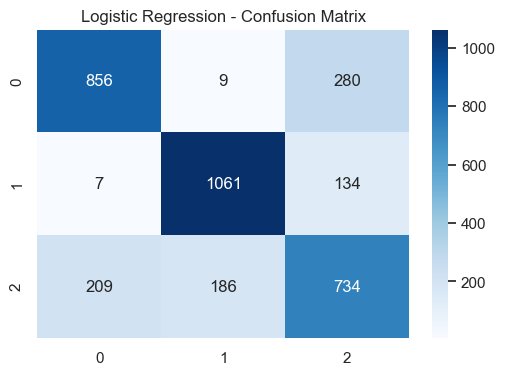

In [462]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [463]:
#KNN classifier

In [464]:
from sklearn.neighbors import KNeighborsClassifier

In [465]:
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [466]:
ky_pred=classifier.predict(X_test)
df=pd.DataFrame(ky_pred,y_test)

In [467]:
cm=confusion_matrix(y_test,ky_pred)
print("confusion_matrix",cm)
print()
accuracy_knn=accuracy_score(y_test,ky_pred)
print('accuracy_score_KNNClassifier',accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, ky_pred))

confusion_matrix [[ 899   54  192]
 [  41 1039  122]
 [ 263  207  659]]

accuracy_score_KNNClassifier 0.7471231300345225

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.79      0.77      1145
         Low       0.80      0.86      0.83      1202
      Medium       0.68      0.58      0.63      1129

    accuracy                           0.75      3476
   macro avg       0.74      0.74      0.74      3476
weighted avg       0.74      0.75      0.74      3476



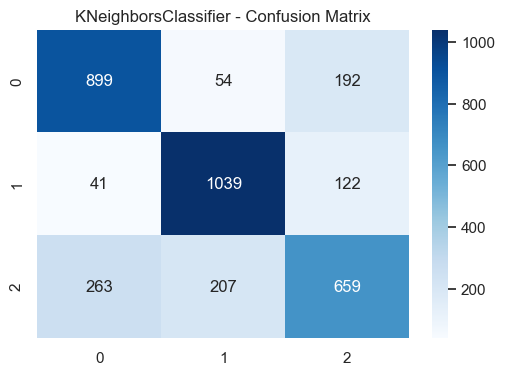

In [488]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,ky_pred), annot=True, fmt='d', cmap="Blues")
plt.title("KNeighborsClassifier - Confusion Matrix")
plt.show()

In [469]:
#Decision Tree Classifier 

In [470]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini",max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [471]:
dy_pred=classifier.predict(X_test)
df=pd.DataFrame(dy_pred,y_test)

In [472]:
cm=confusion_matrix(y_test,dy_pred)
print('confusion_matrix',cm)
accuracy_dtree=accuracy_score(y_test,dy_pred)
print('accuracy_score_Decision_Tree_Classifier',accuracy_dtree)
print("\nClassification Report:\n", classification_report(y_test, dy_pred))

confusion_matrix [[896  27 222]
 [ 55 941 206]
 [420 163 546]]
accuracy_score_Decision_Tree_Classifier 0.6855581127733027

Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.78      0.71      1145
         Low       0.83      0.78      0.81      1202
      Medium       0.56      0.48      0.52      1129

    accuracy                           0.69      3476
   macro avg       0.68      0.68      0.68      3476
weighted avg       0.69      0.69      0.68      3476



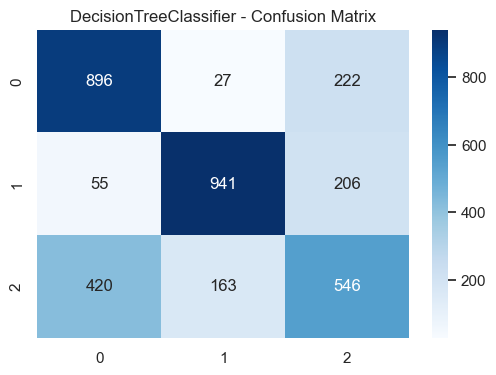

In [489]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dy_pred), annot=True, fmt='d', cmap="Blues")
plt.title("DecisionTreeClassifier - Confusion Matrix")
plt.show()

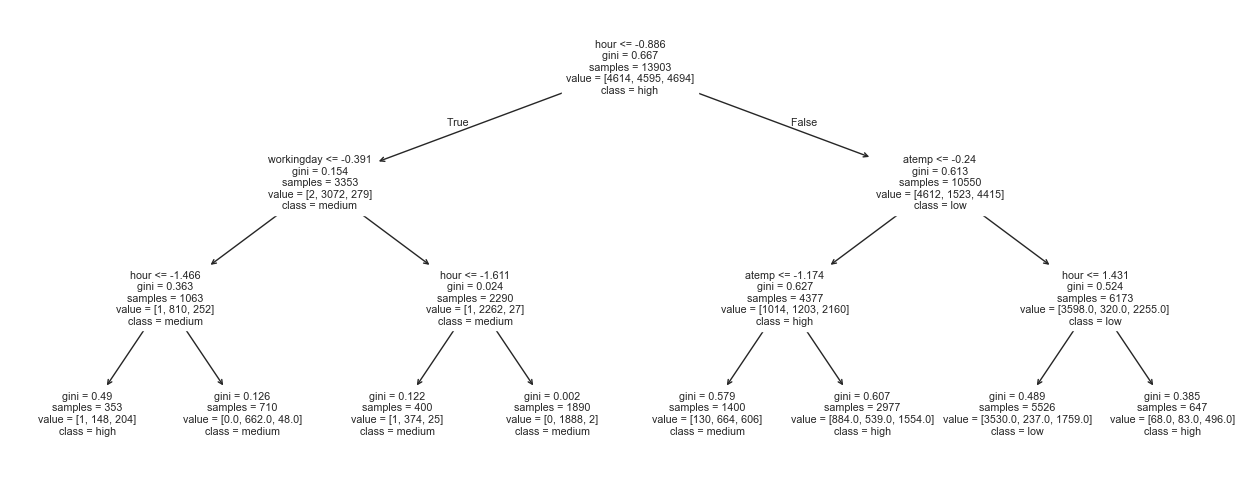

In [474]:
#Tree ploting
from sklearn.tree import plot_tree
plt.figure(figsize=(16,6))
plot_tree(classifier,feature_names=['season','year','month','hour','holiday','weekday','workingday','weathersit	temp','atemp','hum','windspeed'],class_names=["low","medium","high"])
plt.show()

In [475]:
#RandomForestClassifier

In [476]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.pipeline import Pipeline

In [477]:
scaler=StandardScaler()
X_train_standardized=scaler.fit_transform(X_train)
X_test_standardized=scaler.transform(X_test)

In [478]:
normalizer=Normalizer()
X_train_normalized=normalizer.fit_transform(X_train)
X_test_normalized=normalizer.transform(X_test)

In [479]:
# Create Pipeline with sStandardScaler and RandomForest
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',RandomForestClassifier(n_estimators=100))
]) #

In [480]:
#train and Evaluate using cross_validation
cv=StratifiedKFold(n_splits=5,shuffle=True)
cv_score=cross_val_score(pipeline,X_train,y_train,cv=cv,scoring="accuracy")

In [481]:
#Train final model
pipeline.fit(X_train,y_train)
ry_pred=pipeline.predict(X_test)

In [482]:
accuracy_rf=accuracy_score(y_test,ry_pred)

In [483]:
print("cross validation accuracy score",cv_score)
print("\nClassification Report:\n", classification_report(y_test, ry_pred))
print("accuracy_score_RandomForestClassifier",accuracy_rf)

cross validation accuracy score [0.87055016 0.86263934 0.85904351 0.87697842 0.87086331]

Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.90      0.90      1145
         Low       0.93      0.91      0.92      1202
      Medium       0.81      0.83      0.82      1129

    accuracy                           0.88      3476
   macro avg       0.88      0.88      0.88      3476
weighted avg       0.88      0.88      0.88      3476

accuracy_score_RandomForestClassifier 0.8803222094361335


In [ ]:
#SVC

In [484]:
from sklearn.svm import SVC
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVC model
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

# Predict and evaluate
sy_pred = svc.predict(X_test_scaled)

accuracy_svc=accuracy_score(y_test, sy_pred)
print("Accuracy:",accuracy_svc) 
print("\nClassification Report:\n", classification_report(y_test, sy_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, sy_pred))


Accuracy: 0.7626582278481012

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.75      0.77      1145
         Low       0.84      0.88      0.86      1202
      Medium       0.64      0.65      0.64      1129

    accuracy                           0.76      3476
   macro avg       0.76      0.76      0.76      3476
weighted avg       0.76      0.76      0.76      3476


Confusion Matrix:
 [[ 856    9  280]
 [   7 1061  134]
 [ 209  186  734]]


In [485]:
#Collect accuracies scores from all models
ac_scores = {
    "ogistic Regression:":accuracy_log,        
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dtree,    
    "Random Forest": accuracy_rf,
    "SVC": accuracy_svc
}

#  Create a DataFrame for better visualization
ac_bike = pd.DataFrame(list(ac_scores.items()), columns=["Model", "ac Score"]).sort_values(by="ac Score", ascending=False)
print(ac_bike)

                 Model  ac Score
3        Random Forest  0.880322
0  ogistic Regression:  0.762658
4                  SVC  0.762658
1                  KNN  0.747123
2        Decision Tree  0.685558


In [486]:
#The Random Forest Classifier delivered the highest accuracy at 88.55%, indicating it's the most reliable

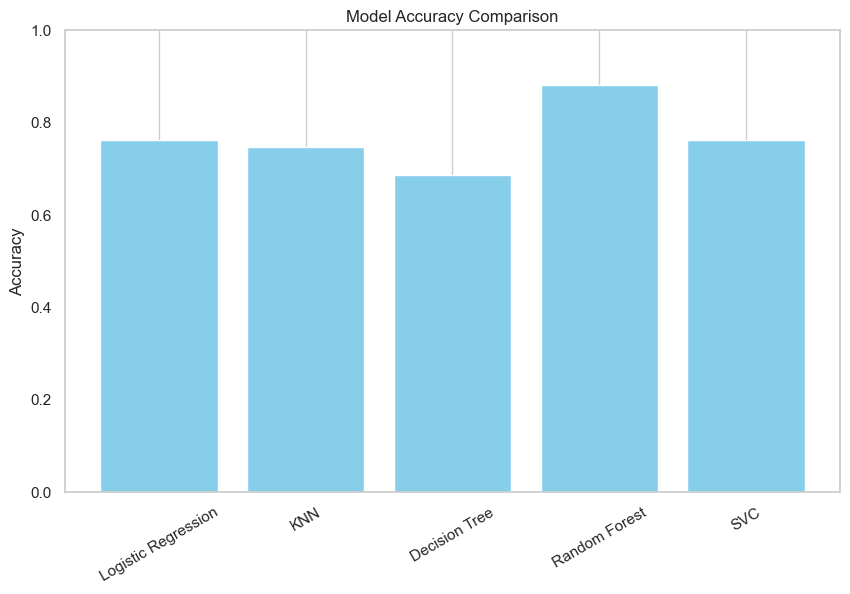

In [487]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVC']
accuracies = [accuracy_log, accuracy_knn, accuracy_dtree, accuracy_rf, accuracy_svc]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


Conclusion
Random Forest emerged as the best model for both regression and classification tasks,